In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/wafer_23012020_041211.csv')
df.head()

,Unnamed: 0,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
0,Wafer-801,2968.33,2476.58,2216.7333,1748.0885,1.1127,100.0,97.5822,0.1242,1.5300,...,NaN,0.5004,0.0120,0.0033,2.4069,0.0545,0.0184,0.0055,33.7876,-1
1,Wafer-802,2961.04,2506.43,2170.0666,1364.5157,1.5447,100.0,96.7700,0.1230,1.3953,...,NaN,0.4994,0.0115,0.0031,2.3020,0.0545,0.0184,0.0055,33.7876,1
2,Wafer-803,3072.03,2500.68,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.3896,...,NaN,0.4987,0.0118,0.0036,2.3719,0.0545,0.0184,0.0055,33.7876,-1
3,Wafer-804,3021.83,2419.83,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.4108,...,NaN,0.4934,0.0123,0.0040,2.4923,0.0545,0.0184,0.0055,33.7876,-1
4,Wafer-805,3006.95,2435.34,2189.8111,1084.6502,1.1993,100.0,104.8856,0.1234,1.5094,...,NaN,0.4987,0.0145,0.0041,2.8991,0.0545,0.0184,0.0055,33.7876,-1


In [3]:
df.shape

(100, 592)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 592 entries, Unnamed: 0 to Good/Bad
dtypes: float64(494), int64(97), object(1)
memory usage: 462.6+ KB


In [5]:
# Check if there is any null values
df.isna().sum().sum()

2306

Dataset contain 2306 null values 

In [6]:
# Check for duplicates
df.duplicated().sum()

0

Dataset contain 0 duplicate values

In [7]:
# Delte 'Unnamed: 0' columns which is categorical  
df = df.drop('Unnamed: 0',axis=1)

In [8]:
# Segregate numerica and categorical columns
numerical_columns   = [col for col in df.columns if df[col].dtype != 'O']
categorical_columns = [col for col in df.columns if df[col].dtype == 'O']

In [9]:
numerical_columns,categorical_columns

(['Sensor-1',
  'Sensor-2',
  'Sensor-3',
  'Sensor-4',
  'Sensor-5',
  'Sensor-6',
  'Sensor-7',
  'Sensor-8',
  'Sensor-9',
  'Sensor-10',
  'Sensor-11',
  'Sensor-12',
  'Sensor-13',
  'Sensor-14',
  'Sensor-15',
  'Sensor-16',
  'Sensor-17',
  'Sensor-18',
  'Sensor-19',
  'Sensor-20',
  'Sensor-21',
  'Sensor-22',
  'Sensor-23',
  'Sensor-24',
  'Sensor-25',
  'Sensor-26',
  'Sensor-27',
  'Sensor-28',
  'Sensor-29',
  'Sensor-30',
  'Sensor-31',
  'Sensor-32',
  'Sensor-33',
  'Sensor-34',
  'Sensor-35',
  'Sensor-36',
  'Sensor-37',
  'Sensor-38',
  'Sensor-39',
  'Sensor-40',
  'Sensor-41',
  'Sensor-42',
  'Sensor-43',
  'Sensor-44',
  'Sensor-45',
  'Sensor-46',
  'Sensor-47',
  'Sensor-48',
  'Sensor-49',
  'Sensor-50',
  'Sensor-51',
  'Sensor-52',
  'Sensor-53',
  'Sensor-54',
  'Sensor-55',
  'Sensor-56',
  'Sensor-57',
  'Sensor-58',
  'Sensor-59',
  'Sensor-60',
  'Sensor-61',
  'Sensor-62',
  'Sensor-63',
  'Sensor-64',
  'Sensor-65',
  'Sensor-66',
  'Sensor-67',
  'S

In [10]:
# From above data there are no categrical columns 

## Distribution of Numerical Data

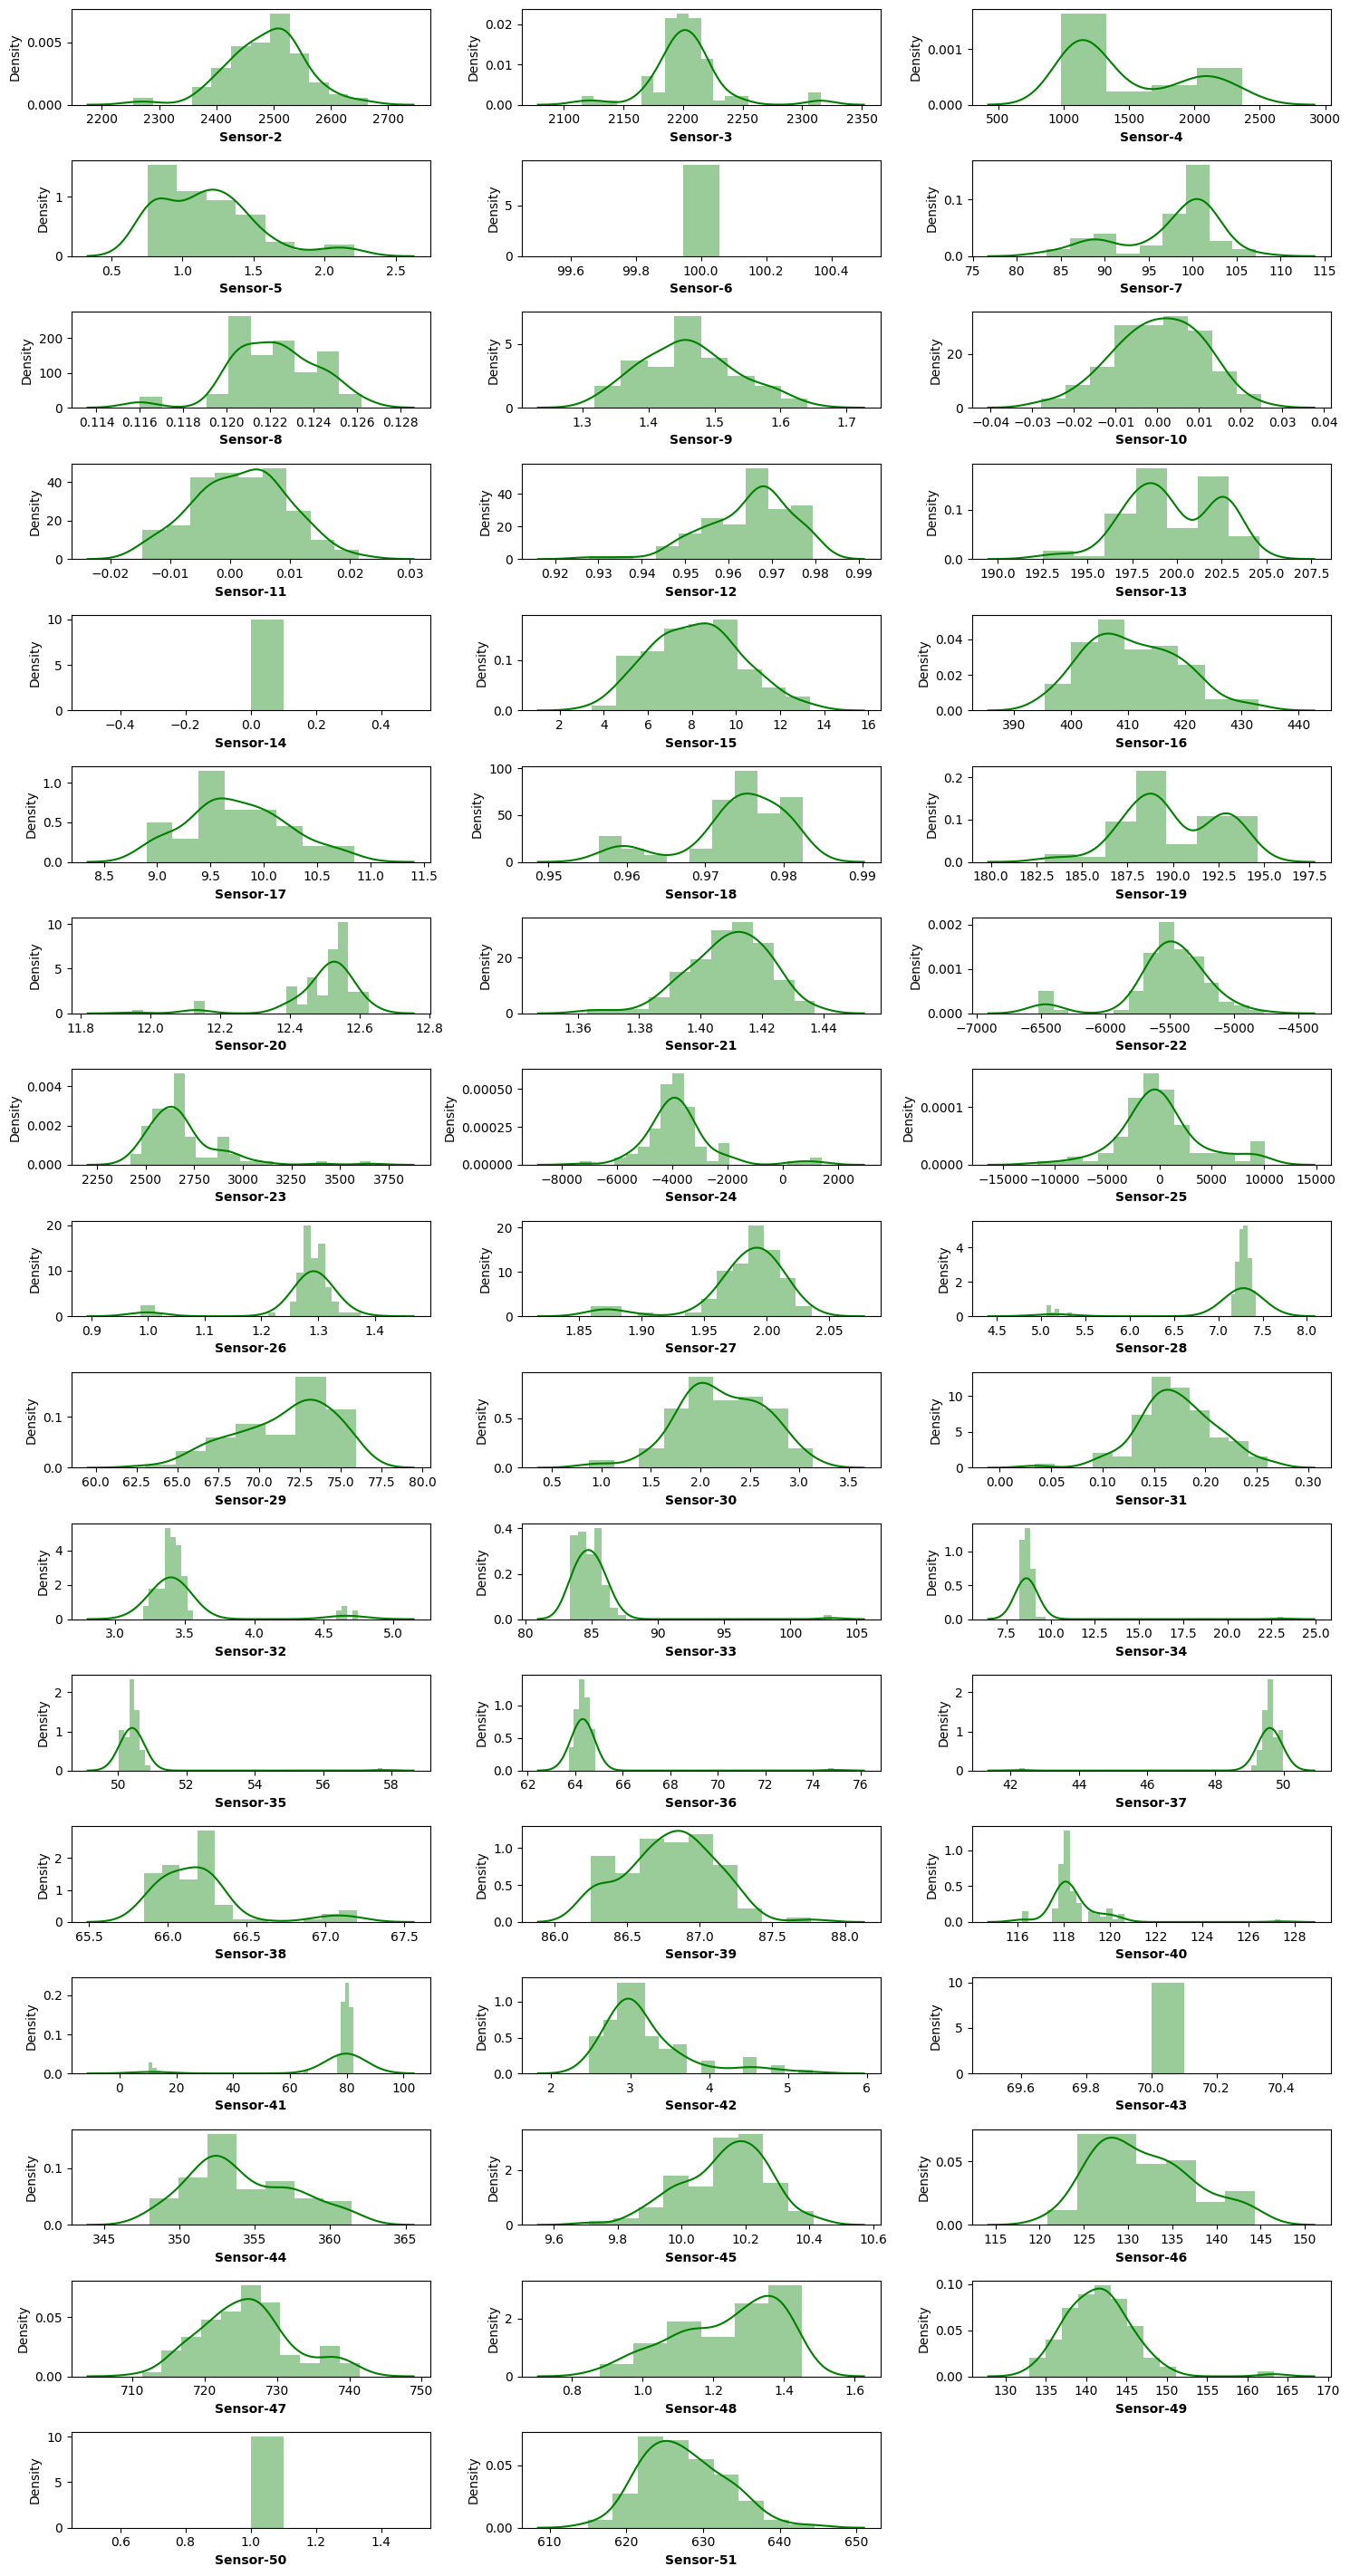

In [11]:
plt.figure(figsize=(15,100))
for i,col in enumerate(numerical_columns[1:51]):
    plt.subplot(60,3,i+1)
    sns.distplot(x=df[col],color="green")
    plt.xlabel(col,weight='bold')
    plt.tight_layout()

## From above Distribution plots, we can conclude that there are some features whose std. dev is zero

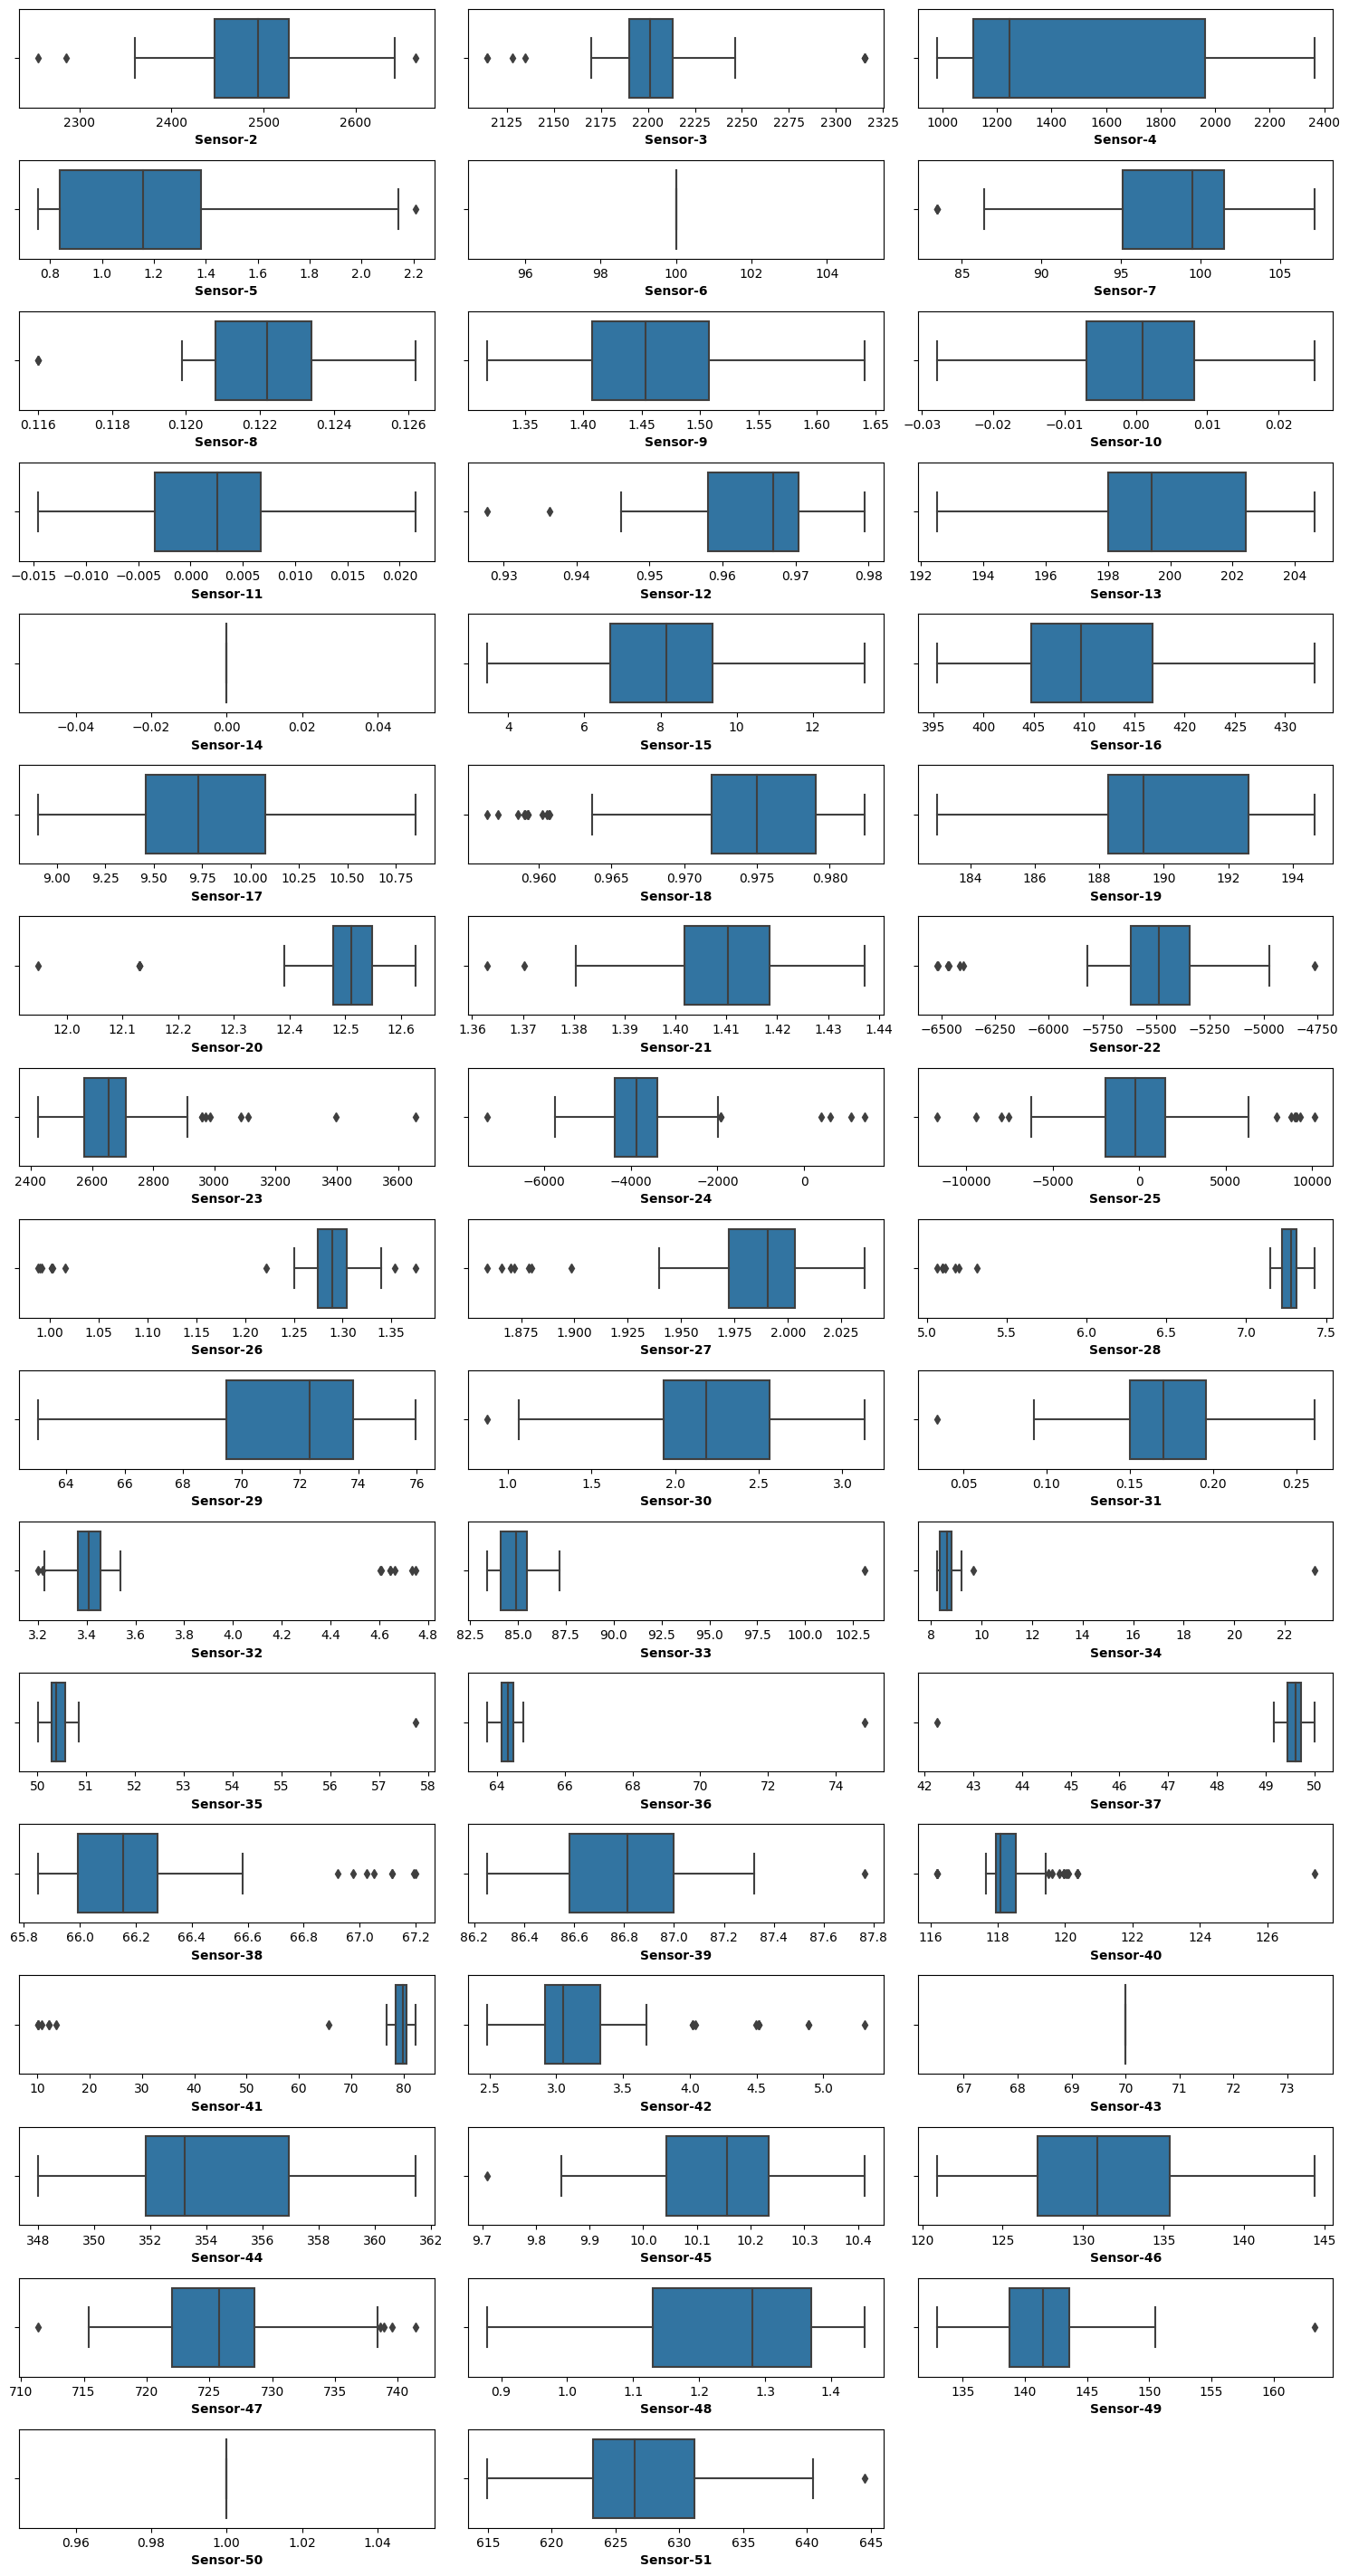

In [12]:
# Distribution plot for features
plt.figure(figsize=(15,100))

for i,col in enumerate(df.columns[1:51]):
    plt.subplot(60,3,i+1)
    sns.boxplot(x=df[col])
    plt.xlabel(col,weight='bold')
    plt.tight_layout()

## From above Boxplots, we can conclude that dataset contains outliers.

In [13]:
# cols_missing_ratio = df[1:30].isna().sum().div(df.shape[0])
# cols_missing_ratio
# cols_to drop = list(cols_missing_ratio[cols_missing_ratio > thresh].index)

In [14]:
# Lets' remove features which contain missing value more than 70%(threshold)
def get_reduntant_cols(df: pd.DataFrame,thresh: 0.7):
    cols_missing_ratio = df.isna().sum().div(df.shape[0])
    cols_to_drop = list(cols_missing_ratio[cols_missing_ratio > thresh].index)
    return cols_to_drop

In [15]:
# Let's remove cols with zero std.  dev.
def get_cols_with_zero_std_dev(df:pd.DataFrame):
    cols_to_drop = []
    for col in df.columns:
        if(df[col].dtype != 'O' and df[col].std() == 0):
            cols_to_drop.append(col)
    
    return cols_to_drop

In [16]:
# Fetch cols to drop having missing values more than threshold
cols_to_dro_missing_val = get_reduntant_cols(df,thresh=0.7)
cols_to_dro_missing_val

['Sensor-158', 'Sensor-159', 'Sensor-293', 'Sensor-294']

## Insight: Total 4 columns with missing values more than threshold

In [17]:
# Festch cols to drop having std. dev. zero
cols_to_drop_zero_std_dev = get_cols_with_zero_std_dev(df)
cols_to_drop_zero_std_dev

['Sensor-6',
 'Sensor-14',
 'Sensor-43',
 'Sensor-50',
 'Sensor-53',
 'Sensor-70',
 'Sensor-75',
 'Sensor-98',
 'Sensor-142',
 'Sensor-150',
 'Sensor-179',
 'Sensor-180',
 'Sensor-187',
 'Sensor-190',
 'Sensor-191',
 'Sensor-192',
 'Sensor-193',
 'Sensor-194',
 'Sensor-195',
 'Sensor-207',
 'Sensor-210',
 'Sensor-227',
 'Sensor-230',
 'Sensor-231',
 'Sensor-232',
 'Sensor-233',
 'Sensor-234',
 'Sensor-235',
 'Sensor-236',
 'Sensor-237',
 'Sensor-238',
 'Sensor-241',
 'Sensor-242',
 'Sensor-243',
 'Sensor-244',
 'Sensor-257',
 'Sensor-258',
 'Sensor-259',
 'Sensor-260',
 'Sensor-261',
 'Sensor-262',
 'Sensor-263',
 'Sensor-264',
 'Sensor-265',
 'Sensor-266',
 'Sensor-267',
 'Sensor-277',
 'Sensor-285',
 'Sensor-314',
 'Sensor-315',
 'Sensor-316',
 'Sensor-323',
 'Sensor-326',
 'Sensor-327',
 'Sensor-328',
 'Sensor-329',
 'Sensor-330',
 'Sensor-331',
 'Sensor-343',
 'Sensor-348',
 'Sensor-365',
 'Sensor-370',
 'Sensor-371',
 'Sensor-372',
 'Sensor-373',
 'Sensor-374',
 'Sensor-375',
 'Se

In [18]:
len(cols_to_drop_zero_std_dev)

122

## Insight: Total 122 columns having zero standard deviation

In [19]:
# Lets combine both to drop columns
cols_to_drop_total = cols_to_dro_missing_val+cols_to_drop_zero_std_dev
len(cols_to_drop_total)

126

In [20]:
# Lets drop columns from dataset
df = df.drop(cols_to_drop_total,axis=1)
df.shape

(100, 465)

## Removing NaN values from features of dataset

In [21]:
# Lets perdorm EDA on target feature
df['Good/Bad'].shape

(100,)

In [23]:
X = df.iloc[:,:-1]
X.head()

y = df[['Good/Bad']]
y.head()

,Good/Bad
0,-1
1,1
2,-1
3,-1
4,-1


In [25]:
X.head()
X.columns,y.columns

(Index(['Sensor-1', 'Sensor-2', 'Sensor-3', 'Sensor-4', 'Sensor-5', 'Sensor-7',
        'Sensor-8', 'Sensor-9', 'Sensor-10', 'Sensor-11',
        ...
        'Sensor-581', 'Sensor-582', 'Sensor-583', 'Sensor-584', 'Sensor-585',
        'Sensor-586', 'Sensor-587', 'Sensor-588', 'Sensor-589', 'Sensor-590'],
       dtype='object', length=464),
 Index(['Good/Bad'], dtype='object'))

In [26]:
# from sklearn.preprocessing import  RobustScaler
from sklearn.impute import  SimpleImputer
from sklearn.pipeline import  Pipeline

preprocessing_pipeline = Pipeline(
    steps= [
        ('impute',SimpleImputer(strategy='median')),
        # ('scaler',RobustScaler())
    ]
)

preprocessing_pipeline


Pipeline(steps=[('impute', SimpleImputer(strategy='median'))])

In [27]:

X_trans = pd.DataFrame(preprocessing_pipeline.fit_transform(X),columns=X.columns)

In [28]:
X_trans

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-7,Sensor-8,Sensor-9,Sensor-10,Sensor-11,...,Sensor-581,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590
0,2968.33,2476.58,2216.7333,1748.0885,1.1127,97.5822,0.1242,1.5300,-0.0279,-0.0040,...,0.00385,65.12755,0.5004,0.0120,0.0033,2.4069,0.0545,0.0184,0.0055,33.7876
1,2961.04,2506.43,2170.0666,1364.5157,1.5447,96.7700,0.1230,1.3953,0.0084,0.0062,...,0.00385,65.12755,0.4994,0.0115,0.0031,2.3020,0.0545,0.0184,0.0055,33.7876
2,3072.03,2500.68,2205.7445,1363.1048,1.0518,101.8644,0.1220,1.3896,0.0138,0.0000,...,0.00385,65.12755,0.4987,0.0118,0.0036,2.3719,0.0545,0.0184,0.0055,33.7876
3,3021.83,2419.83,2205.7445,1363.1048,1.0518,101.8644,0.1220,1.4108,-0.0046,-0.0024,...,0.00385,65.12755,0.4934,0.0123,0.0040,2.4923,0.0545,0.0184,0.0055,33.7876
4,3006.95,2435.34,2189.8111,1084.6502,1.1993,104.8856,0.1234,1.5094,-0.0046,0.0121,...,0.00385,65.12755,0.4987,0.0145,0.0041,2.8991,0.0545,0.0184,0.0055,33.7876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3013.66,2526.44,2185.2111,1141.6306,0.8447,100.5978,0.1217,1.5337,0.0090,0.0058,...,0.00385,65.12755,0.5013,0.0076,0.0021,1.5152,0.0153,0.0048,0.0017,31.0176
96,2982.87,2477.01,2315.2667,2360.1325,1.1259,90.1144,0.1160,1.4695,0.0071,0.0215,...,0.00385,65.12755,0.5003,0.0106,0.0028,2.1263,0.0153,0.0048,0.0017,31.0176
97,3084.82,2387.42,2171.5000,1028.4440,0.7899,101.5122,0.1224,1.3603,-0.0031,0.0086,...,0.00385,65.12755,0.5016,0.0130,0.0028,2.5865,0.0153,0.0048,0.0017,31.0176
98,2955.87,2541.89,2200.9889,1244.2899,1.1569,99.5133,0.1222,1.4493,-0.0194,-0.0018,...,0.00385,65.12755,0.5023,0.0140,0.0033,2.7810,0.0153,0.0048,0.0017,31.0176


In [29]:
df['Good/Bad'].value_counts()

Good/Bad
-1    94
 1     6
Name: count, dtype: int64

## Insight: From above data, we can conclude that target feature is not balanced

## Note: Before resampling of datset, dataset should not contain any missing, NaN values 

In [30]:
# Let's perform upsampling on target feature using SMOTE technique
from imblearn.over_sampling import  SMOTE
oversample = SMOTE()

In [31]:
X_resample,y_resample = oversample.fit_resample(X_trans,df['Good/Bad'])

In [32]:
X_resample.shape

(188, 464)

In [33]:
y_resample.shape
y_resample.value_counts()

Good/Bad
-1    94
 1    94
Name: count, dtype: int64

## Now, dataste is balanced, free of missing values and NaN values.

In [34]:
# Let's combine both
dataset = pd.concat([X_resample,y_resample],axis=1)
dataset.head()

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-7,Sensor-8,Sensor-9,Sensor-10,Sensor-11,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
0,2968.33,2476.58,2216.7333,1748.0885,1.1127,97.5822,0.1242,1.5300,-0.0279,-0.0040,...,65.12755,0.5004,0.0120,0.0033,2.4069,0.0545,0.0184,0.0055,33.7876,-1
1,2961.04,2506.43,2170.0666,1364.5157,1.5447,96.7700,0.1230,1.3953,0.0084,0.0062,...,65.12755,0.4994,0.0115,0.0031,2.3020,0.0545,0.0184,0.0055,33.7876,1
2,3072.03,2500.68,2205.7445,1363.1048,1.0518,101.8644,0.1220,1.3896,0.0138,0.0000,...,65.12755,0.4987,0.0118,0.0036,2.3719,0.0545,0.0184,0.0055,33.7876,-1
3,3021.83,2419.83,2205.7445,1363.1048,1.0518,101.8644,0.1220,1.4108,-0.0046,-0.0024,...,65.12755,0.4934,0.0123,0.0040,2.4923,0.0545,0.0184,0.0055,33.7876,-1
4,3006.95,2435.34,2189.8111,1084.6502,1.1993,104.8856,0.1234,1.5094,-0.0046,0.0121,...,65.12755,0.4987,0.0145,0.0041,2.8991,0.0545,0.0184,0.0055,33.7876,-1


In [35]:
# dataset['Good/Bad'].corr()

In [37]:
dataset.to_csv('data/wafer_preprocess.csv',index=None)